<a href="https://colab.research.google.com/github/franklinperseuDS/TrabalhoModulo03/blob/main/trabalhoEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#DataFrames

In [ ]:
"""dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/MICRODADOS_ENADE_2016.csv',sep=';',decimal=',')
dfMicroDados.shape
"""

In [ ]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

In [ ]:
dfConceito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ano                        4299 non-null   int64  
 1   Código da IES              4299 non-null   int64  
 2   Nome da IES                4299 non-null   object 
 3   Sigla da IES               4299 non-null   object 
 4   Organização Acadêmica      4299 non-null   object 
 5   Categoria Administrativa   4299 non-null   object 
 6   Código do Curso            4299 non-null   int64  
 7   Código da Área             4299 non-null   int64  
 8   Área de Enquadramento      4299 non-null   object 
 9   Modalidade de Ensino       4299 non-null   object 
 10  Código do Município        4299 non-null   int64  
 11  Município do Curso         4299 non-null   object 
 12  Sigla da UF                4299 non-null   object 
 13  Concluintes Inscritos      4299 non-null   int64

## Tratamento do Dataframe 'Conceito' para as seguintes colunas
 1. codigo da IES 
 2. Sigla da IES 
 3. Organização Acadêmica 
 4. 'Município do Curso' 
 5. 'Sigla da UF' 
 6. Concluintes Inscritos 
 7. 'Concluintes Participantes 
 8. <s> 'Nota Bruta - FG', #* deixar por ultimo</s>
 9. 'Nota Padronizada - FG' 
 10. <s> 'Nota Bruta - CE', #* deixar por ultimo </s>
 11. 'Nota Padronizada - CE', 
 12. 'Conceito Enade (Contínuo)' 
 13. Conceito Enade (Faixa)
 14. Código da Área




In [ ]:
dfMedicinaC = dfConceito[dfConceito['Área de Enquadramento'] == 'MEDICINA'][['Código da Área','Código da IES','Sigla da IES','Município do Curso', 'Sigla da UF','Concluintes Inscritos', 'Concluintes Participantes','Nota Padronizada - FG','Nota Padronizada - CE','Conceito Enade (Contínuo)','Conceito Enade (Faixa)']]

In [ ]:
dfMedicinaC['Conceito Enade (Faixa)'] = dfMedicinaC['Conceito Enade (Faixa)'].astype(int)

In [ ]:
dfMedicinaC = dfMedicinaC.reset_index()

## Montando uma coluna de regiões
1 = Região Norte (NO)
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']

2 = Região Nordeste (NE)
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

3 = Região Sudeste (SE)
sudeste = ['MG','ES','RJ,'SP']

4 = Região Sul (SUL)
sul = ['PR','SC','RS']

5 = Região Centro-Oeste (CO)
CentroOeste = ['MS','MT','GO','DF']

In [ ]:
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','ES','RJ','SP']
sul = ['PR','SC','RS']
centroOeste = ['MS','MT','GO','DF']

In [ ]:
dfMedicinaC['Regiao'] = np.nan

In [ ]:
#dfMedicinaC['Regiao'] = dfMedicinaC['Regiao'].astype(int)

In [ ]:
condicao = [np.isin(dfMedicinaC['Sigla da UF'], norte),
            np.isin(dfMedicinaC['Sigla da UF'], nordeste),
            np.isin(dfMedicinaC['Sigla da UF'], sudeste),
            np.isin(dfMedicinaC['Sigla da UF'], sul),
           np.isin(dfMedicinaC['Sigla da UF'],  centroOeste)]

resultados = [1,2,3,4,5]

dfMedicinaC['Regiao'] = np.select(condicao, resultados)

In [ ]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


In [ ]:
#Celula para verificar colunas


#ITEM A


##Notas Gerais


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

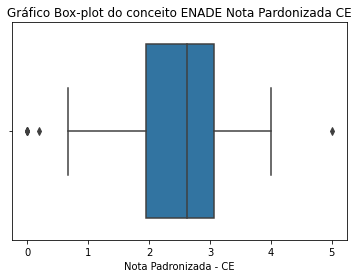

In [ ]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - CE']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

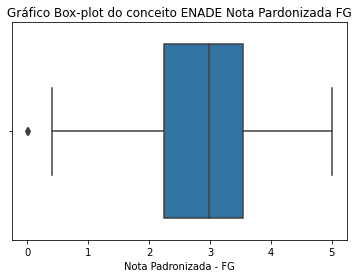

In [ ]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - FG']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

count    176.000000
mean       3.119318
std        0.850191
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conceito Enade (Faixa), dtype: float64

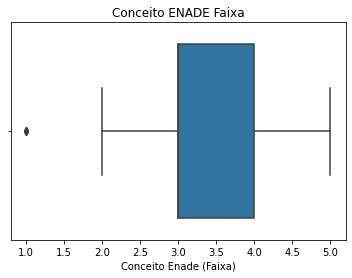

In [ ]:
#Conceito Enade (Faixa)
se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)']).set_title('Conceito ENADE Faixa')
dfMedicinaC['Conceito Enade (Faixa)'].describe()

Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE contínuo de Medicina')

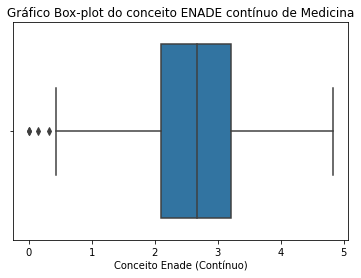

In [ ]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)']).set_title('Gráfico Box-plot do conceito ENADE contínuo de Medicina')

## Gráficos por Região



CO_REGIAO_CURSO
1. = Região Norte (NO)
2. = Região Nordeste (NE)
3. = Região Centro-Oeste (CO)
4. = Região Sul (SUL)
5. =  Região Sudeste (SE)

In [ ]:
contagemNorte = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 1].count()
contagemNordeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 2].count()
contagemSudeste = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 3].count()
contagemSul = dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 4].count()
contagemCentroOeste=dfMedicinaC['Município do Curso'].loc[dfMedicinaC['Regiao'] == 5].count()

print ('Número de inscritos por região:')
print (f'1. Norte = {contagemNorte}')
print (f'2. Nordeste = {contagemNordeste}')
print (f'3. Sudeste = {contagemSudeste}')
print (f'4. Sul = {contagemSul}')
print (f'5. Centro-Oeste = {contagemCentroOeste}')
print(f'Total = {contagemNorte + contagemNordeste + contagemSudeste + contagemSul + contagemCentroOeste}')

Número de inscritos por região:
1. Norte = 16
2. Nordeste = 39
3. Sudeste = 78
4. Sul = 31
5. Centro-Oeste = 12
Total = 176


###Boxsplot - Nota Padronizada FG

In [ ]:
NomeDaColuna = 'Nota Padronizada - FG'

Text(0.5, 1.0, 'Nota Padronizada - FG - Região Norte')

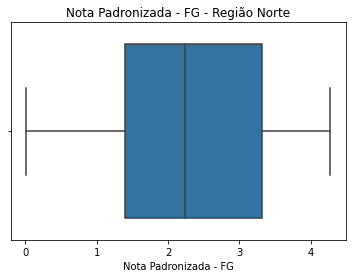

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Nordeste')

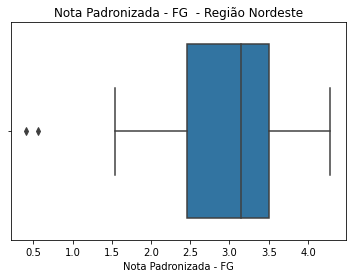

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  -  Região Centro-Oeste')

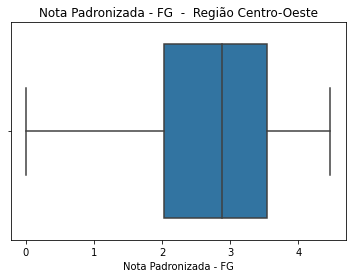

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sul')

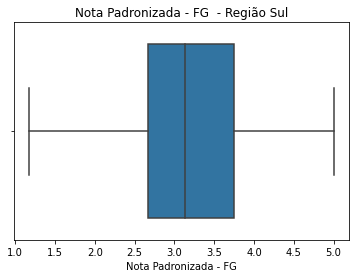

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sudeste')

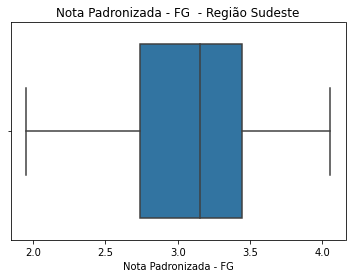

In [ ]:
se.boxplot(x = dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - FG

Text(0.5, 1.0, 'Nota Padronizada - FG - Região Norte')

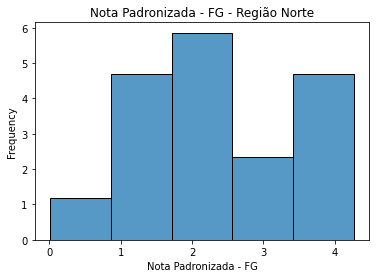

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Nordeste')

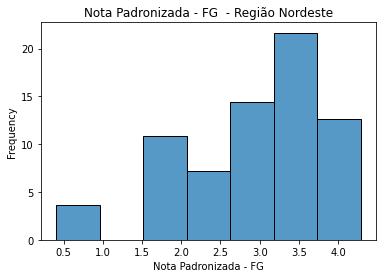

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Regiao Centro-Oeste')

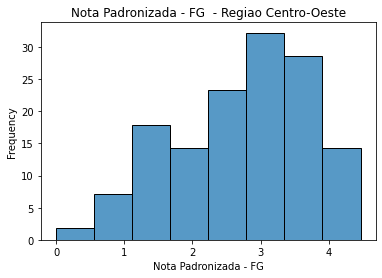

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

Text(0.5, 1.0, 'Nota Padronizada - FG  - Região Sul')

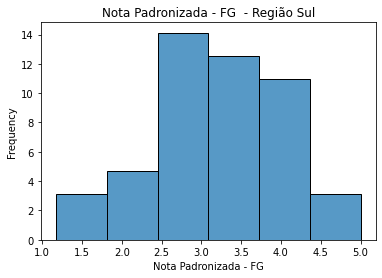

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NPCE}  - Região Sudeste")

NameError: ignored

###Boxsplot - Nota Padronizada - CE

In [ ]:
NomeDaColuna = 'Nota Padronizada - CE'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Nota Padronizada - CE

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NPCE, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste ")

###Boxsplot - Conceito Enade (Faixa)

In [ ]:
NomeDaColuna = 'Conceito Enade (Faixa)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste x= NPCE, stat='frequency').set_title(F"{NPCE} ")

###Boxsplot - Conceito Enade (Contínuo)

In [ ]:
NomeDaColuna = 'Conceito Enade (Contínuo)'

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 1)[NomeDaColuna]).set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 2)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 3)[NomeDaColuna]).set_title(F"{NomeDaColuna}  -  Região Centro-Oeste")

In [ ]:
NomeDaColunase.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 4)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.boxplot(dfMedicinaC.where(dfMedicinaC['Regiao'] == 5)[NomeDaColuna]).set_title(F"{NomeDaColuna}  - Região Sudeste")

###Histograma - Conceito Enade (Faixa)

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 1), x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna} - Região Norte")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 2),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Nordeste")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 3),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Regiao Centro-Oeste")

In [ ]:
NomeDaColunase.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 4),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sul")

In [ ]:
se.histplot(data= dfMedicinaC.where(dfMedicinaC['Regiao'] == 5),  x= NomeDaColuna, stat='frequency').set_title(F"{NomeDaColuna}  - Região Sudeste  ")

# **ITEM B**


In [ ]:
dfMedicinaC.head()

In [ ]:
# cria variáveis para as colunas
conc_inscritos = dfMedicinaC['Concluintes Inscritos']
conc_participantes = dfMedicinaC['Concluintes Participantes']
nota_fg = dfMedicinaC['Nota Padronizada - FG']
nota_ce = dfMedicinaC['Nota Padronizada - CE']
conceito_cont = dfMedicinaC['Conceito Enade (Contínuo)']
conceito_faixa = dfMedicinaC['Conceito Enade (Faixa)']

In [ ]:
# função para calcular simetria
def calc_simetria(media, mediana):
  if (media > mediana):
    return 'ASSIMÉTRICA POSITIVA'
  elif (media < mediana):
    return 'ASSIMÉTRICA NEGATIVA'
  else:
    return 'SIMÉTRICA'

## **B - Variável 'Concluintes Inscritos'**

In [ ]:
# Info
conc_inscritos.describe()

In [ ]:
# Criar lista
inscritos_array = np.array(conc_inscritos, dtype = float)
print (inscritos_array)

In [ ]:
# Média
ci_media = st.mean(inscritos_array)
ci_media

In [ ]:
# Mediana
ci_mediana = st.median(inscritos_array)
ci_mediana

In [ ]:
# Moda
ci_moda = st.mode(inscritos_array) # st.multimode(inscritos_array)
ci_moda

In [ ]:
# Desvio-padrão
ci_desvio_padrao = np.std(inscritos_array)
ci_desvio_padrao

In [ ]:
# Coeficiente de variação
ci_coef_variacao = np.var(inscritos_array)
ci_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(ci_media, ci_mediana))
print()
se.boxplot(x = conc_inscritos).set_title('Gráfico Box-plot dos concluintes inscritos')

## **B - Variável 'Concluintes Participantes'**

In [ ]:
# Info
conc_participantes.describe()

In [ ]:
# Criar lista
participantes_array = np.array(conc_participantes, dtype = float)
print (participantes_array)

In [ ]:
# Média
cp_media = st.mean(participantes_array)
cp_media

In [ ]:
# Mediana
cp_mediana = st.median(participantes_array)
cp_mediana

In [ ]:
# Moda
cp_moda = st.mode(participantes_array) # st.multimode(participantes_array)
cp_moda

In [ ]:
# Desvio-padrão
cp_desvio_padrao = np.std(participantes_array)
cp_desvio_padrao

In [ ]:
# Coeficiente de variação
cp_coef_variacao = np.var(participantes_array)
cp_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cp_media, cp_mediana))
print()
se.boxplot(x = conc_participantes).set_title('Gráfico Box-plot dos concluintes participantes')

## **B - Variável 'Nota Padronizada - FG'**

In [ ]:
# Info
nota_fg.describe()

In [ ]:
# Criar lista
nota_fg_array = np.array(nota_fg, dtype = float)
print (nota_fg_array)

In [ ]:
# Média
fg_media = st.mean(nota_fg_array)
fg_media

In [ ]:
# Mediana
fg_mediana = st.median(nota_fg_array)
fg_mediana

In [ ]:
# Moda
#fg_moda = st.mode(nota_fg_array) # st.multimode(nota_fg_array)
#fg_moda
print('Não tem moda, pois nenhum valor se repete.')

In [ ]:
# Desvio-padrão
fg_desvio_padrao = np.std(nota_fg_array)
fg_desvio_padrao

In [ ]:
# Coeficiente de variação
fg_coef_variacao = np.var(nota_fg_array)
fg_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(fg_media, fg_mediana))
print()
se.boxplot(x = nota_fg, ).set_title('Gráfico Box-plot da nota padronizada (FG)')

## **B - Variável 'Nota Padronizada - CE'**

In [ ]:
# Info
nota_ce.describe()

In [ ]:
# Criar lista
nota_ce_array = np.array(nota_ce, dtype = float)
print (nota_ce_array)

In [ ]:
# Média
ce_media = st.mean(nota_ce_array)
ce_media

In [ ]:
# Mediana
ce_mediana = st.median(nota_ce_array)
ce_mediana

In [ ]:
# Moda
ce_moda = st.mode(nota_ce_array) # st.multimode(nota_ce_array)
ce_moda

In [ ]:
# Desvio-padrão
ce_desvio_padrao = np.std(nota_ce_array)
ce_desvio_padrao

In [ ]:
# Coeficiente de variação
ce_coef_variacao = np.var(nota_ce_array)
ce_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(ce_media, ce_mediana))
print()
se.boxplot(x = nota_ce).set_title('Gráfico Box-plot da nota padronizada (CE)')

## **B - Variável 'Conceito Enade - Contínuo'**

In [ ]:
# Info
conceito_cont.describe()

In [ ]:
# Criar lista
conceito_cont_array = np.array(conceito_cont, dtype = float)
print (conceito_cont_array)

In [ ]:
# Média
cc_media = st.mean(conceito_cont_array)
cc_media

In [ ]:
# Mediana
cc_mediana = st.median(conceito_cont_array)
cc_mediana

In [ ]:
# Moda
#cc_moda = st.mode(conceito_cont_array) # st.multimode(conceito_cont_array)
#cc_moda
print('Não tem moda, pois nenhum valor se repete.')

In [ ]:
# Desvio-padrão
cc_desvio_padrao = np.std(conceito_cont_array)
cc_desvio_padrao

In [ ]:
# Coeficiente de variação
cc_coef_variacao = np.var(conceito_cont_array)
cc_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cc_media, cc_mediana))
print()
se.boxplot(x = conceito_cont).set_title('Gráfico Box-plot da Conceito Endade (Contínuo)')

## **B - Variável 'Conceito Enade - Faixa'**

In [ ]:
# Info
conceito_faixa.describe()

In [ ]:
# Criar lista
conceito_faixa_array = np.array(conceito_faixa, dtype = float)
print (conceito_faixa_array)

In [ ]:
# Média
cf_media = st.mean(conceito_faixa_array)
cf_media

In [ ]:
# Mediana
cf_mediana = st.median(conceito_faixa_array)
cf_mediana

In [ ]:
# Moda
cf_moda = st.mode(conceito_faixa_array) # st.multimode(conceito_faixa_array)
cf_moda

In [ ]:
# Desvio-padrão
cf_desvio_padrao = np.std(conceito_faixa_array)
cf_desvio_padrao

In [ ]:
# Coeficiente de variação
cf_coef_variacao = np.var(conceito_faixa_array)
cf_coef_variacao

In [ ]:
# Simetria
print("A variável é", calc_simetria(cf_media, cf_mediana))
print()
se.boxplot(x = conceito_faixa).set_title('Gráfico Box-plot da Conceito Endade (Faixa)')

# ITEM C

## C - Variável Nota Padronizada - FG

In [ ]:
notaFG_array = np.array(nota_fg, dtype = float)
print (notaFG_array)

In [ ]:
# Média
fg_media = st.mean(notaFG_array)
fg_media

In [ ]:
# Mediana
fg_mediana = st.median(notaFG_array)
fg_mediana

In [ ]:
# Moda
fg_moda = st.mode(notaFG_array) # st.multimode(inscritos_array)
fg_moda

In [ ]:
# Desvio Padrao
fg_std = np.std(notaFG_array)
fg_std

In [ ]:
# Coeficiente de variação
fg_coef_variacao = fg_std/fg_media
cv_fg = fg_coef_variacao
fg_coef_variacao

In [ ]:
# Simetria
se.boxplot(x = dfMedicinaC['Nota Padronizada - FG'], ).set_title('Gráfico Box-plot das Notas Padronizadas FG')

## C - Variável Nota Padronizada - CE

In [ ]:
notaCE_array = np.array(nota_ce, dtype = float)
print (notaCE_array)

In [ ]:
# Média
ce_media = st.mean(notaCE_array)
ce_media

In [ ]:
# Mediana
ce_mediana = st.median(notaCE_array)
ce_mediana

In [ ]:
# Moda
ce_moda = st.mode(notaCE_array) # st.multimode(inscritos_array)
ce_moda

In [ ]:
# Desvio Padrao
ce_std = np.std(notaCE_array)
ce_std

In [ ]:
# Coeficiente de variação
ce_coef_variacao = ce_std/ce_media
cv_ce = ce_coef_variacao
cv_ce

In [ ]:
se.boxplot(x = dfMedicinaC['Nota Padronizada - CE'], ).set_title('Gráfico Box-plot das Notas Padronizadas CE')

## C - Variável Conceito Enade (Contínuo)

In [ ]:
CEC_array = np.array(conceito_cont, dtype = float)
print (CEC_array)

In [ ]:
# Média
cec_media = st.mean(CEC_array)
cec_media

In [ ]:
# Mediana
cec_mediana = st.median(CEC_array)
cec_mediana

In [ ]:
# Moda
cec_moda = st.mode(CEC_array) # st.multimode(inscritos_array)
cec_moda

In [ ]:
# Desvio Padrao
cec_std = np.std(CEC_array)
cec_std

In [ ]:
# Coeficiente de variação
ce_coef_variacao = cec_std/cec_media
cv_ce = ce_coef_variacao
ce_coef_variacao

In [ ]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Contínuo)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Contínuo)')

## C - Variável Conceito Enade (Faixa)

In [ ]:
CEF_array = np.array(conceito_faixa, dtype = float)
print (CEF_array)

In [ ]:
# Média
cef_media = st.mean(CEF_array)
cef_media

In [ ]:
# Mediana
cef_mediana = st.median(CEF_array)
cef_mediana

In [ ]:
# Moda
cef_moda = st.mode(CEF_array) # st.multimode(inscritos_array)
cef_moda

In [ ]:
# Desvio Padrao
cef_std = np.std(CEF_array)
cef_std

In [ ]:
# Coeficiente de variação
ce_coef_variacao = cef_std/cef_media
cv_cef = ce_coef_variacao
cv_cef

In [ ]:
se.boxplot(x = dfMedicinaC['Conceito Enade (Faixa)'], ).set_title('Gráfico Box-plot da Variável Conceito Enade (Faixa)')

## C- Verificar normalidade

In [ ]:
#funçao que verifica normalidade
# função para calcular simetria
def normalidade(h):
  h0 = stats.shapiro(h)
  if (h0[1] > 0.5):
    return 'normalizados'
  else:
    return 'não normalizados'

In [ ]:
print('Valores de conc_inscritos são ', normalidade(conc_inscritos))
print('Valores de conc_participantes são ', normalidade(conc_participantes))
print('Valores de nota_fg são ', normalidade(nota_fg))
print('Valores de nota_ce são ', normalidade(nota_ce))
print('Valores de conceito_cont são ', normalidade(conceito_cont))
print('Valores de conceito_faixa são ', normalidade(conceito_faixa))


## Por Regiões

In [ ]:
rNO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 1]
rNE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 2]
rSE = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 3]
rSU = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 4]
rCO = dfMedicinaC.loc[dfMedicinaC['Regiao'] == 5]

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNO).set_title('Nota Padroniza FG - Regiao Norte')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rNE).set_title('Nota Padroniza FG - Regiao Nordeste')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSE).set_title('Nota Padroniza FG - Regiao Sudeste')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rSU).set_title('Nota Padroniza FG - Regiao Sul')

In [ ]:
ax = se.boxplot(x = 'Nota Padronizada - FG', data = rCO).set_title('Nota Padroniza FG - Regiao Centro-Oeste')

#**ITEM D**

In [ ]:
dfMedicina = dfConceito[dfConceito['Código da Área'] == 12]
dfMedicina.head()

,Ano,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Código da Área,Área de Enquadramento,Modalidade de Ensino,Código do Município,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa)
2,2016,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pessoa Jurídica de Direito Público - Federal,12,12,MEDICINA,Educação Presencial,5103403,CUIABÁ,MT,35,33,63.166668,3.473179,68.506058,2.759319,2.937784,3
8,2016,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pessoa Jurídica de Direito Público - Federal,140,12,MEDICINA,Educação Presencial,5300108,BRASÍLIA,DF,89,85,63.005882,3.436836,68.930588,2.841475,2.990315,4
13,2016,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pessoa Jurídica de Direito Público - Federal,303,12,MEDICINA,Educação Presencial,2800308,ARACAJU,SE,53,53,59.494339,2.643099,67.986794,2.658829,2.654896,3
17,2016,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pessoa Jurídica de Direito Público - Federal,389,12,MEDICINA,Educação Presencial,1302603,MANAUS,AM,36,35,66.708572,4.273778,66.128571,2.299221,2.792860,3
21,2016,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pessoa Jurídica de Direito Público - Federal,484,12,MEDICINA,Educação Presencial,2211001,TERESINA,PI,45,45,63.433334,3.533455,72.671112,3.565352,3.557378,4


In [ ]:
dfMedicina["Conceito Enade (Faixa)"] = pd.to_numeric(dfMedicina['Conceito Enade (Faixa)'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
qtdMedicina = len(dfMedicina)
print("Quantidade de Universidades com medicina: ", qtdMedicina)

MediaConceitoEnade = dfMedicina['Conceito Enade (Faixa)'].mean() 
print("Média geral(Medicina) do conceito ENADE: ", round(MediaConceitoEnade,3))

DesvioConceitoEnade = dfMedicina.loc[:,"Conceito Enade (Faixa)"].std()
print("Desvio padrão geral(Medicina) do conceito ENADE: ", round(DesvioConceitoEnade,3))

Quantidade de Universidades com medicina:  176
Média geral(Medicina) do conceito ENADE:  3.119
Desvio padrão geral(Medicina) do conceito ENADE:  0.85


In [ ]:
#Intervalo de Confiança ao nível de 95%;
print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
inf,sup = t.interval(0.95, qtdMedicina-1, loc=MediaConceitoEnade, scale=DesvioConceitoEnade/np.sqrt(qtdMedicina))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 2.993
Limite superior 95%: 3.246


In [ ]:
# Número de amostras, para ERRO máximo de 10%
n = (t.ppf(0.025,qtdMedicina-1)**2)*(st.stdev(dfMedicina.iloc[:,20])**2)/(0.01**2)
print("Tamanho da amostra =",round(n))

Tamanho da amostra = 28155.0


In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    tam_amostra = (t.ppf(0.025,n-1)**2)*(st.stdev(data)**2)/(0.01**2)
    return 'Coluna[{}]: Média {}, I.C.[{}, {}], e número de amostras (c/ erro máximo de 10%) {}'.format(titulos[Coluna], round(m,4), round(m-h,4), round(m+h,4), round(tam_amostra,4))

In [ ]:
titulos = list(dfMedicina.columns.values)
i = 0
while i < len(titulos):
    print( "[%d] = %s"%(i, titulos[i]) )
    i+=1

[0] = Ano
[1] = Código da IES
[2] = Nome da IES
[3] = Sigla da IES
[4] = Organização Acadêmica
[5] = Categoria Administrativa
[6] = Código do Curso
[7] = Código da Área
[8] = Área de Enquadramento
[9] = Modalidade de Ensino
[10] = Código do Município
[11] = Município do Curso
[12] = Sigla da UF
[13] = Concluintes Inscritos
[14] = Concluintes Participantes
[15] = Nota Bruta - FG
[16] = Nota Padronizada - FG
[17] = Nota Bruta - CE
[18] = Nota Padronizada - CE
[19] = Conceito Enade (Contínuo)
[20] = Conceito Enade (Faixa)


In [ ]:
dfMedicina.iloc[:,19]

2       2.937784
8       2.990315
13      2.654896
17      2.792860
21      3.557378
          ...   
3833    2.660124
4029    2.078226
4185    2.786400
4293    1.438373
4295    2.447981
Name: Conceito Enade (Contínuo), Length: 176, dtype: float64

In [ ]:
#@title Número da coluna desejada { output-height: 10, form-width: "99%" }
Coluna = 20 #@param {type:"integer"}

SAIDA = mean_confidence_interval(dfMedicina.iloc[:,Coluna])
SAIDA

'Coluna[Conceito Enade (Faixa)]: Média 3.1193, I.C.[2.9928, 3.2458], e número de amostras (c/ erro máximo de 10%) 28155.0775'

In [ ]:
q10 = [25.2,26,26.4,27.1,28.2,28.4]
q10

[25.2, 26, 26.4, 27.1, 28.2, 28.4]

In [ ]:
mean_confidence_interval(q10)

'Coluna[Conceito Enade (Faixa)]: Média 26.8833, I.C.[25.5618, 28.2048], e número de amostras (c/ erro máximo de 10%) 104779.1246'